## Normalization and Standardization

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import pylab
import numpy as np
# %matplotlib inline

In [31]:
df=pd.read_csv('../HandleMissingValues/train.csv', usecols=['Pclass', 'Age', 'Survived', 'Fare'])

In [32]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [33]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [34]:
df['Age'].fillna(df.Age.median(), inplace=True)

In [35]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Standard Scaler

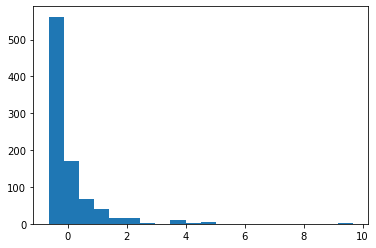

In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)

# Converting it into DataFrame
pd.DataFrame(df_scaled)

plt.hist(df_scaled[:,3], bins=20)
plt.show()




### Min-Max Scaling
- It is used to scale values between 0 to 1

In [37]:
from sklearn.preprocessing import MinMaxScaler

min_max=MinMaxScaler()

# Changed to DataFrame
df_minMax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)

df_minMax.head()


,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


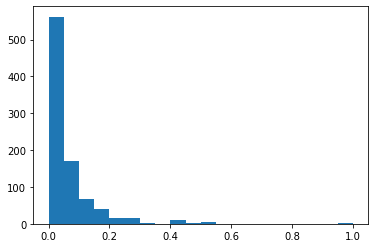

In [38]:
plt.hist(df_minMax['Fare'], bins=20)
plt.show()

### Robust Scaler
- Use this in presence of Outliers it is more Robust

In [39]:
from sklearn.preprocessing import RobustScaler

scaler=RobustScaler()
df_robust=pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

df_robust.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


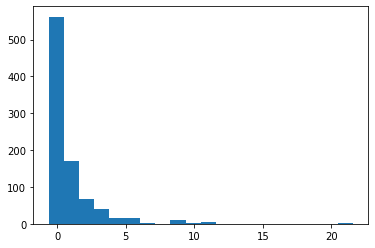

In [40]:
plt.hist(df_robust['Fare'], bins=20)
plt.show()

### Gausian Transformation

To convert the features in gausian transformation we use the following methods
 <br/>It will hence give
 1. Better Accuracy
 2. Performance



 - Logarithmic Transformation( **Best to use when data is right or left skewed**)
 - Recipocal Transformation
 - Square Root Transformation
 - Exponential Transformation
 - Boxcox Transformation

In [41]:
df=pd.read_csv('../HandleMissingValues/train.csv', usecols=[ 'Age', 'Survived', 'Fare'])

In [42]:
df['Age'].fillna(df.Age.median(), inplace=True)


#### To check wheter the feature is gaussian or normal distributed . Q-Q plot is used

In [43]:
def plot_data(df, feature):
    # This is for the left graph
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)

    # This is for the right graph if it's majority of the data is following in the red line, then it is gausian transformation otherwise not
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()


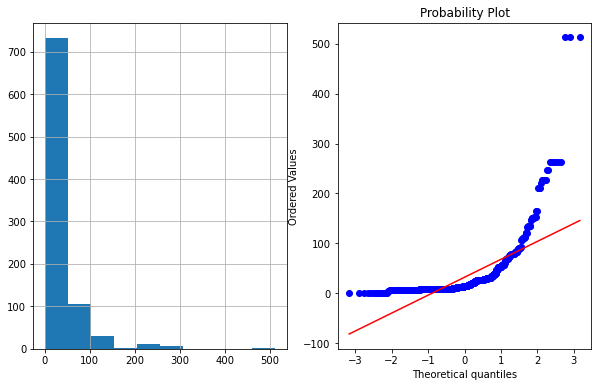

In [45]:
plot_data(df,'Fare')


#### To fix this right skewness and convert it into gausain transformation we will apply<br/> **Logarithmic Trasnsormationm**

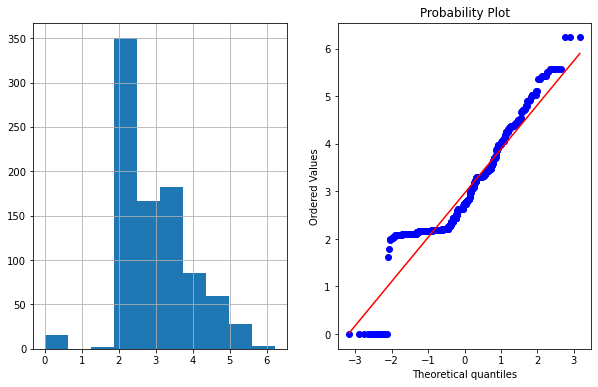

In [46]:
df['Fare_log']=np.log1p(df['Fare'])
plot_data(df,'Fare_log')

### Recipoal Tranformation

In [ ]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

#### Square Root Transformation

In [ ]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

#### Exponential Transformation

In [ ]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

#### BoxCot Tranformation

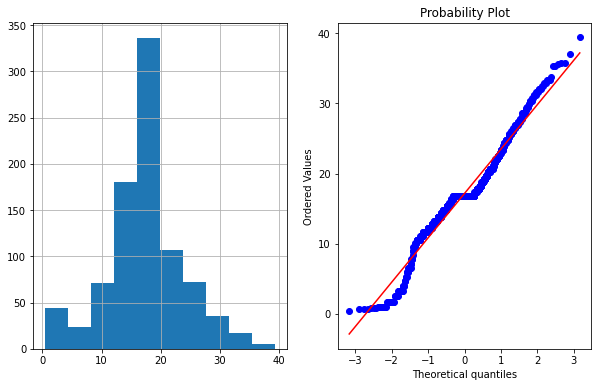

In [49]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age']+1)
plot_data(df,'Age_Boxcox')